In [1]:
#frequency

import pandas as pd
df = pd.read_csv("collegePlace.csv")
df['Age'].value_counts()

21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: Age, dtype: int64

In [2]:
#Mean

df['Age'].mean()

21.48583951449764

In [3]:
#Median

df['CGPA'].median()

7.0

In [4]:
#Mode

df['Age'].mode()

0    21
Name: Age, dtype: int64

In [5]:
#Variance

df['CGPA'].var()

0.9413901678266984

In [6]:
df['CGPA'].std()

0.9702526309300575

In [7]:
encD = pd.get_dummies(df, columns = ['Gender'])
encD

,Age,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,Gender_Female,Gender_Male
0,22,Electronics And Communication,1,8,1,1,1,0,1
1,21,Computer Science,0,7,1,1,1,1,0
2,22,Information Technology,1,6,0,0,1,1,0
3,21,Information Technology,0,8,0,1,1,0,1
4,22,Mechanical,0,8,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
2961,23,Information Technology,0,7,0,0,0,0,1
2962,23,Mechanical,1,7,1,0,0,0,1
2963,22,Information Technology,1,7,0,0,0,0,1
2964,22,Computer Science,1,7,0,0,0,0,1


Intercept: 0.035705723677719736

Coefficient: 0.006042914676226454


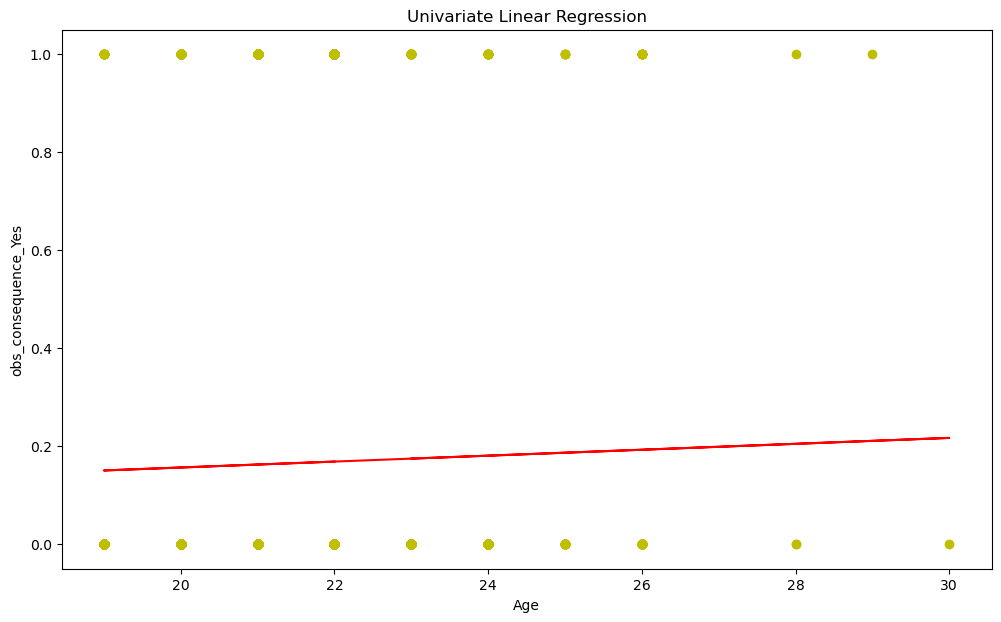

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = encD['Age']
y = encD['Gender_Female']
def mean(vals):
    return sum(vals)/float(len(vals))
def variance(vals):
    val_mean = mean(vals)
    return sum([(x-val_mean)**2 for x in vals])
def covariance(x,x_mean,y,y_mean):
    cov = 0.0
    for i in range(len(x)):
        cov += (x[i]-x_mean) * (y[i]-y_mean)
    return cov
def getBetas(x,y):
    x_mean = mean(x)
    y_mean = mean(y)
    cov = covariance(x,x_mean,y,y_mean)
    x_var = variance(x)
    b1 = cov/x_var
    b0 = np.mean(y) - b1 * np.mean(x)
    return b0,b1
def predict(x,y):
    intercept,coeff = getBetas(x,y)
    preds = intercept+(coeff*x)
    return preds
intercept, coeff = getBetas(x,y)
print(f'Intercept: {intercept}\n\nCoefficient: {coeff}')
fcov_preds = predict(x,y)

#with plt.style.context('dark_background'):
plt.figure(figsize=(12,7))
plt.plot(x,y,'yo',x,fcov_preds,'r-',fillstyle='full')
plt.xlabel('Age')
plt.ylabel('obs_consequence_Yes')
plt.title('Univariate Linear Regression');

In [9]:
df[['PlacedOrNot', 'Age']].groupby('PlacedOrNot').mean()

,Age
PlacedOrNot,
0,21.416729
1,21.541794


In [10]:
df.groupby(['Gender', 'Hostel'])['Age'].mean()

Gender  Hostel
Female  0         21.517241
        1         21.586957
Male    0         21.478762
        1         21.454225
Name: Age, dtype: float64

<AxesSubplot:ylabel='Density'>

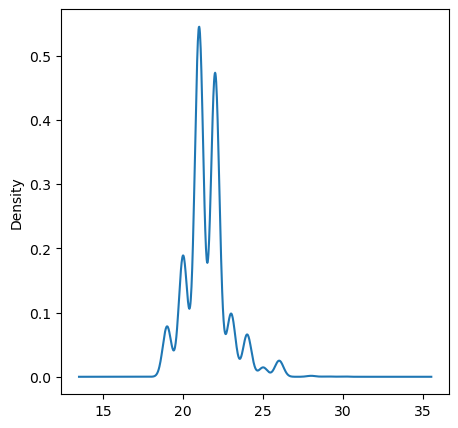

In [11]:
plt.figure(figsize = (5,5))
df['Age'].plot(kind = 'density')

<AxesSubplot:>

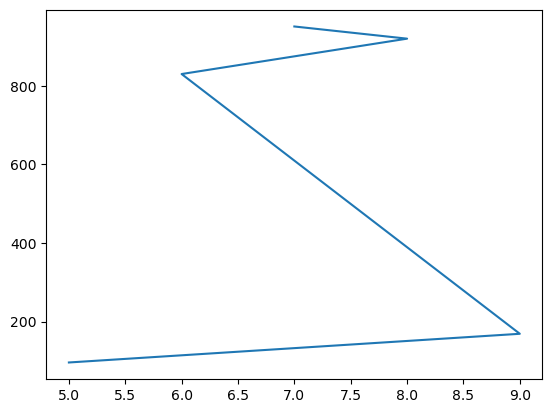

In [12]:
df['CGPA'].value_counts( ).plot()